In [15]:
import numpy as np
import pandas as pd
from konlpy.tag import Mecab
from collections import Counter
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image

In [16]:
items = pd.read_parquet("nike_review_star.parquet")

In [17]:
items

,url,review,star
0,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...,[메트콘4로 존버타다가 7나온다는 소식에 기다렸다가 멧프레이저 에디션이라 고민도 안...,"[width: 100%;, width: 100%;, width: 100%;]"
1,https://www.nike.com/kr/ko_kr/t/women/fw/nike-...,[키가 커지네요ㅎ뒷모습 이쁘고 귀여워요오래신으니 조금 작은듯 느껴집니다발볼이 좀 있...,"[width: 80%;, width: 80%;, width: 60%;]"
2,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...,"[천의 촉감도 좋고, 신발이 생각보다 뒷굽이 높아서 구름속을 걷는 느낌이 있어서 좋...","[width: 100%;, width: 100%;]"
3,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...,[안감이 누빔들어간것처럼 푹신한게 있는데여름에 신기에 너무 더워요예뻐서 샀는데.. ...,"[width: 60%;, width: 100%;, width: 100%;, widt..."
4,https://www.nike.com/kr/ko_kr/t/women/fw/nike-...,[리뷰가 없습니다],[]
...,...,...,...
311,https://www.nike.com/kr/ko_kr/t/men/fw/golf/CI...,[응모 제품입니다],[]
312,https://www.nike.com/kr/ko_kr/t/women/fw/nike-...,"[형께 드렸는데 너무이쁘고 편하다고 합니다, 올블랙의 카리스마가 돋보입니다 매우편하...","[width: 100%;, width: 100%;, width: 100%;, wid..."
313,https://www.nike.com/kr/ko_kr/t/adult-unisex/f...,"[very good, 신발 왠만해선 275 신으면 다 맞았습니다.나이키 자노스키 라...","[width: 100%;, width: 60%;, width: 100%;, widt..."
314,https://www.nike.com/kr/ko_kr/t/men/fw/nike-sp...,"[확실히 작은편인데 신다보니 조금 늘어나네요, 예뻐요~~, 예뻐요~~, 디자인도 심...","[width: 100%;, width: 100%;, width: 100%;, wid..."


In [18]:
items.isnull().sum()

url       0
review    0
star      0
dtype: int64

In [19]:
texts=items.get('review')
type(texts)

pandas.core.series.Series

In [20]:
tagger = Mecab(dicpath="C://mecab/mecab-ko-dic")

In [21]:
stop_words = "듯 협 십 간 선 곳 위 포토 힘 주 조 대 억 명 은 이 것 등 더 를 좀 즉 인 옹 때 만 원 이때 개 일 기 시 럭 갤 성 삼 스 폰 트 드 기 이 리 폴 사 전 마 자 플 블 가 중 북 수 팩 년 월 저 탭"
stop_words = stop_words.split(' ')

In [22]:
#texts 타입을 str 으로 바꿔야함

In [23]:
"".join(texts[0])

'메트콘4로 존버타다가 7나온다는 소식에 기다렸다가 멧프레이저 에디션이라 고민도 안하고 질렀습니다!사이즈는 정사이즈 추천드리고~ 발볼러라면 반업정도 추천합니다! 근데 재질에 유연성이 좋아서 왠만하면 정사이즈 강추!나노 2-10까지 다 신어봤지만 나이키는 처음인데 발볼이 넓고 발등이 높으면 .5업 보통은 정싸이즈일듯바닥을 잘잡아줘서 역도는 편한데 다른 동작은 봐야겠습니다. 일단 멧프레져 신발이면 끝!!병행수입으로 살려면 피눈물 흘릴걸?'

In [24]:
tagger.nouns("".join(texts[0]))

['메트',
 '콘',
 '존',
 '버',
 '소식',
 '멧',
 '프레이저',
 '에디션',
 '고민',
 '사이즈',
 '정',
 '사이즈',
 '추천',
 '발볼',
 '라면',
 '반',
 '업',
 '정도',
 '추천',
 '재질',
 '정',
 '사이즈',
 '강추',
 '나노',
 '나이키',
 '처음',
 '발볼',
 '발등',
 '업',
 '보통',
 '정',
 '싸이',
 '즈',
 '듯',
 '바닥',
 '역도',
 '동작',
 '멧',
 '프레',
 '져',
 '신발',
 '끝',
 '병행',
 '수입',
 '피눈물']

In [25]:
title_nouns=[]

for post in texts:
    for noun in tagger.nouns("".join(post)):
        if noun not in stop_words:
                title_nouns.append(noun)
title_nouns

['메트',
 '콘',
 '존',
 '버',
 '소식',
 '멧',
 '프레이저',
 '에디션',
 '고민',
 '사이즈',
 '정',
 '사이즈',
 '추천',
 '발볼',
 '라면',
 '반',
 '업',
 '정도',
 '추천',
 '재질',
 '정',
 '사이즈',
 '강추',
 '나노',
 '나이키',
 '처음',
 '발볼',
 '발등',
 '업',
 '보통',
 '정',
 '싸이',
 '즈',
 '바닥',
 '역도',
 '동작',
 '멧',
 '프레',
 '져',
 '신발',
 '끝',
 '병행',
 '수입',
 '피눈물',
 '키',
 '뒷모습',
 '발볼',
 '치수',
 '업',
 '꺼',
 '보라색',
 '실밥',
 '그게',
 '택',
 '신어',
 '신발',
 '쪽',
 '나이',
 '재질',
 '쪽',
 '풀칠',
 '실',
 '그것',
 '만족',
 '택',
 '잘못',
 '천',
 '촉감',
 '신발',
 '생각',
 '뒷굽',
 '구름',
 '속',
 '느낌',
 '느낌',
 '사카이',
 '프리미엄',
 '구입',
 '사카이',
 '안감',
 '게',
 '여름',
 '신기',
 '캔버스',
 '이거',
 '슬랙스',
 '착화',
 '생각',
 '부담',
 '게',
 '편안',
 '맘',
 '오랜만',
 '에어',
 '슈즈',
 '편안',
 '디자인',
 '맘',
 '코디',
 '스니커즈',
 '느낌',
 '캐주얼',
 '옷',
 '꺼',
 '만족',
 '만족',
 '전반',
 '화이트',
 '브라운',
 '계통',
 '가운데',
 '쪽',
 '파스텔',
 '색상',
 '눈',
 '거',
 '음정',
 '사이즈',
 '주문',
 '찰떡궁합',
 '옷',
 '발',
 '거',
 '후회',
 '뻔',
 '색상',
 '베이지',
 '거',
 '샷',
 '다음',
 '인생',
 '신발',
 '신발',
 '하나',
 '감동',
 '사카이',
 '느낌',
 '사카이',
 '단정',
 '감사',
 '리뷰',
 '정',
 '사이즈',
 '강추',


In [26]:
num_top_nouns = 100
title_nouns_counter = Counter(title_nouns)
title_top_nouns = dict(title_nouns_counter.most_common(num_top_nouns))
print(type(title_top_nouns))

<class 'dict'>


In [27]:
from wordcloud import WordCloud, STOPWORDS
nike_wc = WordCloud(background_color="white", font_path="C:/Windows/Fonts/gulim.ttc")
nike_wc.generate_from_frequencies(title_top_nouns)

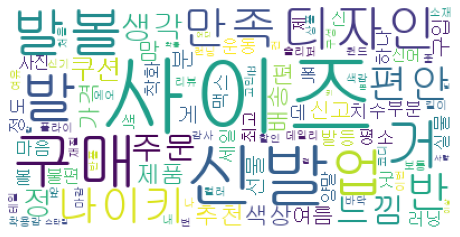

In [28]:
figure = plt.figure()
figure.set_size_inches(8,8)
ax = figure.add_subplot(1,1,1)
ax.axis("off")
ax.imshow(nike_wc)

plt.show()

In [58]:
#사이즈가 들어간 문구

num_sentences=[]

for idx, post in enumerate(texts):
    for idx2, sen in enumerate(post):
        for noun in tagger.nouns(sen):
            
            if noun == '사이즈':
                num_sentences.append((idx,idx2))

num_sentences

[(0, 0),
 (0, 0),
 (0, 0),
 (3, 11),
 (5, 0),
 (5, 1),
 (5, 11),
 (5, 11),
 (5, 13),
 (5, 15),
 (5, 29),
 (5, 33),
 (5, 59),
 (5, 59),
 (5, 65),
 (5, 78),
 (5, 85),
 (5, 85),
 (5, 91),
 (5, 94),
 (5, 97),
 (5, 97),
 (5, 102),
 (5, 104),
 (5, 108),
 (5, 108),
 (5, 110),
 (5, 121),
 (5, 123),
 (5, 127),
 (5, 148),
 (5, 151),
 (5, 157),
 (5, 157),
 (5, 160),
 (5, 160),
 (5, 169),
 (5, 169),
 (5, 169),
 (5, 171),
 (5, 177),
 (5, 185),
 (5, 186),
 (5, 187),
 (5, 190),
 (5, 191),
 (5, 191),
 (5, 195),
 (5, 195),
 (5, 204),
 (5, 204),
 (5, 204),
 (5, 207),
 (5, 209),
 (5, 217),
 (5, 217),
 (5, 219),
 (5, 222),
 (5, 224),
 (5, 224),
 (5, 227),
 (5, 229),
 (5, 231),
 (5, 233),
 (5, 236),
 (5, 236),
 (5, 236),
 (5, 255),
 (5, 256),
 (5, 256),
 (5, 257),
 (5, 262),
 (5, 264),
 (5, 265),
 (5, 266),
 (5, 270),
 (5, 271),
 (5, 276),
 (5, 276),
 (5, 278),
 (5, 279),
 (5, 279),
 (5, 280),
 (5, 280),
 (5, 280),
 (5, 287),
 (5, 288),
 (5, 289),
 (5, 297),
 (5, 298),
 (5, 298),
 (5, 298),
 (5, 303),
 (5,

In [62]:
set(num_sentences)

{(77, 481),
 (217, 263),
 (284, 2388),
 (287, 965),
 (298, 71),
 (91, 7),
 (270, 9),
 (284, 3062),
 (295, 182),
 (284, 1979),
 (273, 392),
 (19, 18),
 (60, 19),
 (77, 517),
 (273, 163),
 (301, 82),
 (284, 1341),
 (217, 119),
 (291, 68),
 (292, 33),
 (54, 241),
 (122, 259),
 (284, 2015),
 (303, 42),
 (307, 421),
 (284, 2918),
 (295, 38),
 (217, 613),
 (34, 3),
 (77, 602),
 (284, 1606),
 (287, 183),
 (298, 192),
 (295, 303),
 (190, 21),
 (307, 277),
 (309, 207),
 (314, 136),
 (287, 1351),
 (5, 204),
 (294, 78),
 (77, 229),
 (284, 150),
 (284, 3039),
 (87, 130),
 (280, 445),
 (217, 734),
 (297, 89),
 (298, 313),
 (284, 1318),
 (63, 38),
 (217, 96),
 (77, 85),
 (291, 45),
 (284, 1992),
 (287, 569),
 (122, 7),
 (289, 84),
 (307, 398),
 (273, 405),
 (314, 28),
 (58, 337),
 (184, 184),
 (284, 271),
 (295, 280),
 (289, 120),
 (122, 92),
 (284, 1848),
 (284, 2751),
 (280, 157),
 (86, 26),
 (298, 205),
 (284, 1439),
 (184, 40),
 (196, 14),
 (58, 638),
 (284, 801),
 (5, 217),
 (307, 110),
 (77, 4

In [70]:
for i in set(num_sentences):
    print(texts[int(i[0])][int(i[1])])

발볼있고 등이 높고 왼발이 커서 한사이즈 업했어요귀엽기도 하고편하고 좋아요여름내내 잘입을께요
초4아들 다른것과 달리 작음 사이즈 업해서 신어야할듯
아무 옷에나 잘 어울릴 것 같아요~ 사이즈는 정사이즈 사면 될 듯합니다.
하나살라고 마음 먹고있었는데 때마침 세일 득템했네요 정사이즈는 좀 팍빡한데 길이는 좀 남는듯한..혀라고해야되나 그게 굉장히 짝퉁스러움 ㅎ
사이즈가 살짝 크네요 그래도 발볼이 여유있고 신었을떄 간지 작살입니다
제가 발볼이 넓은 편인데도 사이즈 반치수다운했는데 딱맞네요 오래 걸으니까 발목이 아파요
사이즈 잘 맞고 이쁩니다. 주변에서도 다 괜찮다고 하네요~~~
정사이즈가 딱 좋은거같아요 크게 안신어도될거같아요
사이즈 발볼이 저는 넓어서크게 시켰는데 좋네요
발 260 발폭 10.5 인데 265 사이즈 딱 맞아요
기존 나이키제품으로 페가수스 터보2를 만족하며 신었습니다.템포넥스트가 포지션상 터보2의 연장선이 아닐까싶어 출시하자마자 구매했네요~컨셉자체가 알파플라이로 이어지는 러닝을 만들기위한 훈련용조깅화& 리액트쿠션을 덧대어 내구성을 강화한 러닝화 & 단거리용보다는 하프이상의 중장거리러닝이후에도 무리가 덜 가는 러닝화로 알고 있기에,신발 받자마자 쓰는 리뷰보다는최소 하프나 풀코스 이후의 리뷰가 조금 더 정확하지 않을까싶어서,한 번의 풀코스와 15km러닝 이후 후기남깁니다.한강풀코스로 3시간29분,15km는 440페이스로 뛰어보았지요.처음 발을 집어넣을때 입구가 좁아 버겁습니다.많은분들이 이 부분을 단점으로 적으셨는데,저 역시 마찬가지였구요.허나, 발을 넣는순간 정말 잘 감싸준단생각이 들었네요.러닝 중에도 잘 잡아준다란 느낌이었습니다.발볼도 제 기준엔 적당히 조여주기에 정사이즈라고 생각됩니다(터보2 275,템포 275)무게는 저울에 재어보니 275기준 270g정도네요.터보2보단 확실히 무거웠어요.이 부분은 단점이겠네요.뛰면서 느낀점은앞축과 뒷축이 거의 제로드랍에 가깝기때문에적응하는데 시간이 걸렸습니다.처음엔 뭐지?했지만 뛰다보니 크게 불편함 없었고,뒷꿈치착

사이즈는 무조건 업 필수! 편해요!!!
임신 4개월차 와이프 사줬는데 푹신해서 좋답니다. 발등을 잘 잡아주고 바닥도 미끄럽지 않아서 마음에 드네요. 맥스(240)랑 동일사이즈 시켰더니 잘 맞아요~
양말 신고 신어도 이쁘고 맨발로 신어도 이뻐요 발등에 찍찍이가 매우 짱짱해서 양말 신고 신으면 약간? 조이는 느낌 있지만 크게 거슬리진 않아요, 운동화 250, 구두 255 신는데 250 사이즈 여유없이 딱 맞아요! 맨발로 신는 게 조금 더 편했어요. 걸을 때 발가락 아픈 거 없이 매우 편하고 바닥도 폭신하고 생각했던 것보다 기능이 좋아 만족합니당!
신발은 편하고 이쁜데 저 앞코..무슨일인거죠?오늘 매장가서 교환하러가야하는 번거로움을 주셨네요온라인구입은 교환도 안되고 반품 후 재구입이라니..리뷰보고 한사이즈 업해서 구매했더니 딱 맞아요 폭싴폭신하고 좋습니다
완전 회색이 아니라 푸른빛 도는 이지700 v2 이너시아랑 비슷하네요. 어디에 신어도 잘 어울릴 것 같고 사이즈는 다른 맥스90처럼 반업했고 편안히 잘 맞습니다.
볼이 조금 좁아서 볼넓은 분은 한사이즈 크게 추천 맨발로 신으면 딱 맞네요 발등을 감싸주는 면적이 넓고 끈으로 조절할수 있어 신고 소리없이 신고 다닐수 있습니다.
사이즈 등 좋은데 가짜인듯 마감처러리가 아쉽습니다설마설마 하고 그냥 신고 있는데 조금 찝찝합니다.
나이키 매장에서 직원이 신은거 보고 예쁘다 생각했는데공식몰에서 저렴하게 구입했네요사진보다 훨씬 예뻐요크게나왔다는 후기가 많은데 전 정사이즈로 주문했습니다편하고 너무 좋네요
사이즈, 쿠션감 모두 좋습니다.단점이 있다면 입구가 조금 좁네요.
이상품 리뷰보고 사세요 정사이즈 시켰다가 낭패임 ㅋㅋ
착용감 정말 좋아요. 정 사이즈로 발등이 높으신 분들은 사이즈업 추천이여.
배송도 빠르고 사이즈도 딱맞네요^^
데브보단 클래식합니다사이즈는 동일하고요~
실물이 좀 더 이쁘고 끈도 반짝이네요 ㅋㅋ. 착화감이 좀 특이한데 출퇴근용이라 어떨런지 발바닥안쪽 느낌이...암튼 어서 봄이 오면 좋겟네요. 사이즈는 정사이즈하니

In [57]:
texts[0][2]

'병행수입으로 살려면 피눈물 흘릴걸?'